Bonnie Brown	Seller	Has house and wants to move soon (timing?), but wants high profit in middle class NH (neighborhood)

In [33]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [40]:
import pandas as pd

# Load the data
house_details = pd.read_csv('data/king_county_house_details_202512091442.csv')
house_sales = pd.read_csv('data/king_county_house_sales_202512091442.csv')

# Join the dataframes
df_merged = house_sales.merge(
    house_details, 
    left_on='house_id',  # Column in house_sales
    right_on='id',        # Column in house_details
    how='outer'           # keep all records from both dataframes
)
df_merged.head(50)

,date,price,house_id,id_x,id_y,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-09-16,280000.000,1000102,2495,1000102,6.000,3.000,2400.000,9373.000,2.000,...,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000
1,2015-04-22,300000.000,1000102,2496,1000102,6.000,3.000,2400.000,9373.000,2.000,...,7,2400.000,0.000,1991,0.000,98002,47.326,-122.214,2060.000,7316.000
2,2014-05-08,647500.000,1200019,6730,1200019,4.000,1.750,2060.000,26036.000,1.000,...,8,1160.000,900.000,1947,0.000,98166,47.444,-122.351,2590.000,21891.000
3,2014-08-11,400000.000,1200021,8405,1200021,3.000,1.000,1460.000,43000.000,1.000,...,7,1460.000,0.000,1952,0.000,98166,47.443,-122.347,2250.000,20023.000
4,2015-04-01,235000.000,2800031,8801,2800031,3.000,1.000,1430.000,7599.000,1.500,...,6,1010.000,420.000,1930,0.000,98168,47.478,-122.265,1290.000,10320.000
5,2015-03-19,402500.000,3600057,3554,3600057,4.000,2.000,1650.000,3504.000,1.000,...,7,760.000,890.000,1951,20130.000,98144,47.580,-122.294,1480.000,3504.000
6,2015-03-30,680000.000,3600072,18507,3600072,4.000,2.750,2220.000,5310.000,1.000,...,7,1170.000,1050.000,1951,NaN,98144,47.580,-122.294,1540.000,4200.000
7,2015-02-24,178000.000,3800008,3198,3800008,5.000,1.500,1990.000,18200.000,1.000,...,7,1990.000,0.000,1960,NaN,98178,47.494,-122.262,1860.000,8658.000
8,2014-07-09,487000.000,5200087,21048,5200087,4.000,2.500,2540.000,5001.000,2.000,...,9,2540.000,0.000,2005,0.000,98108,47.542,-122.302,2360.000,6834.000
9,2014-11-12,281000.000,6200017,4330,6200017,3.000,1.000,1340.000,21336.000,1.500,...,5,1340.000,0.000,1945,0.000,98032,47.402,-122.273,1340.000,37703.000


We researched what are the indicators that affect the selling price the most in order to drop the columns which are less relevant to identify the price range of her property and identify the best moment to sell (higher demand, higher selling price).

US Market (Suburban / King County)
    Features that drive price:

    -Living space & layout – Larger sqft_living and usable space (sqft_above) increase value;

    -House quality & condition – High grade and well-maintained homes sell faster;

    -View & waterfront – Scenic features significantly boost desirability;

    -Bedrooms & bathrooms – Ensure the number aligns with typical buyer expectations;

    -Renovation / recent updates – Updated kitchens, bathrooms, or overall renovation increase price;

    -Location (zipcode, neighborhood) – Neighborhood desirability is critical.

Therefore I am dropping the following columns:
'house_id','id_y','lat','long','sqft_basement','sqft_lot15',

In [50]:
import pandas as pd

# Load the data
house_details = pd.read_csv('data/king_county_house_details_202512091442.csv')
house_sales = pd.read_csv('data/king_county_house_sales_202512091442.csv')

# Join the dataframes
df_merged = house_sales.merge(
    house_details, 
    left_on='house_id',  # Column in house_sales
    right_on='id',        # Column in house_details
    how='outer'           # keep all records from both dataframes
)

df_merged = df_merged.drop(['sqft_living15','id_y','lat','long','sqft_basement','sqft_lot15','yr_built','sqft_above','condition','floors','sqft_lot','bedrooms','bathrooms','view'], axis=1)
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged = df_merged.sort_values('date')
df_merged.head(20)

,date,price,house_id,id_x,sqft_living,waterfront,grade,yr_renovated,zipcode
5948,2014-05-02,838000.000,2326059099,17025,3310.000,0.000,9,NaN,98052
13487,2014-05-02,630000.000,5561000920,17042,2710.000,0.000,9,0.000,98027
13482,2014-05-02,437500.000,5561000190,16755,1970.000,0.000,9,0.000,98027
12242,2014-05-02,308500.000,4408100095,15114,850.000,0.000,7,0.000,98155
9370,2014-05-02,295000.000,3438501320,20544,1630.000,0.000,7,0.000,98106
1946,2014-05-02,335000.000,943100683,14076,1580.000,0.000,7,0.000,98024
4210,2014-05-02,470000.000,1737320120,18676,2210.000,0.000,8,0.000,98011
5223,2014-05-02,287200.000,2025700730,13096,1850.000,0.000,7,0.000,98038
13672,2014-05-02,750000.000,5652600185,6706,2240.000,0.000,8,0.000,98115
4263,2014-05-02,315000.000,1771000430,16303,1160.000,0.000,7,0.000,98077


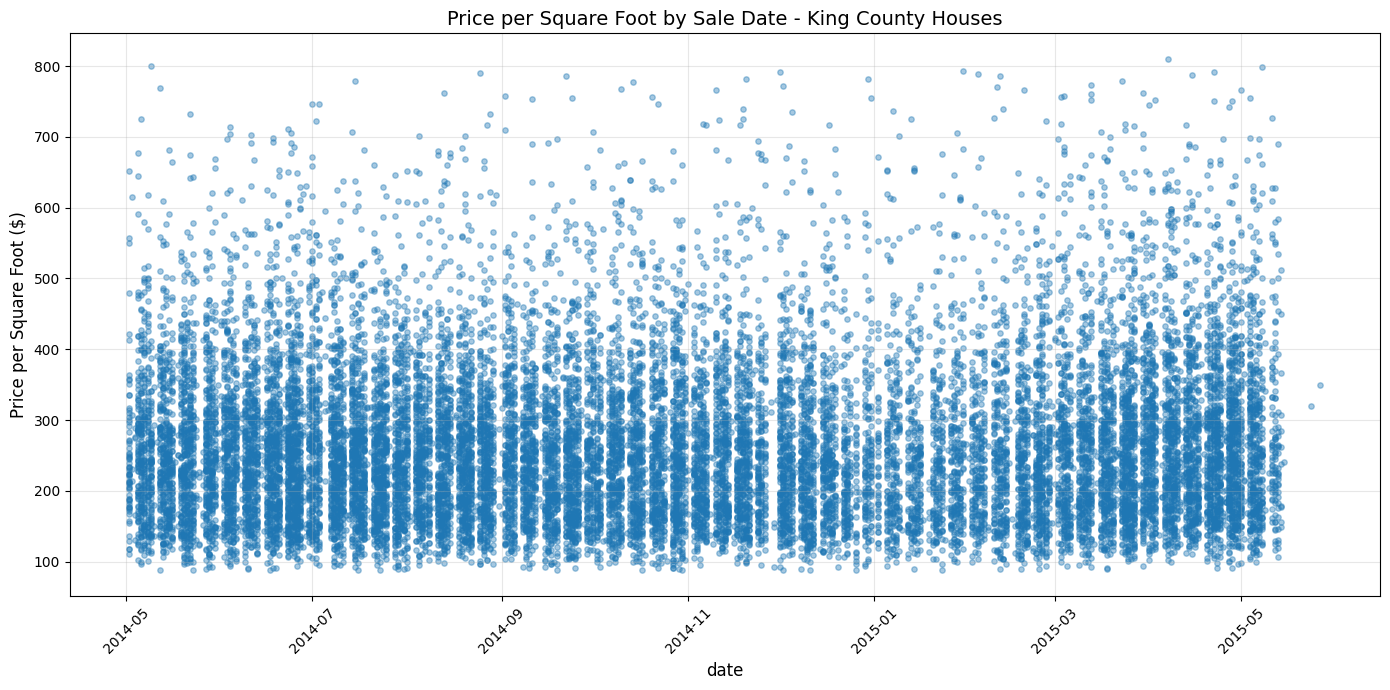

In [56]:
# Calculate price per sqft for each house
df_merged['price_per_sqft'] = df_merged['price'] / df_merged['sqft_living']
df_merged.head(20)
# Create scatter plot - each point is a separate sale
plt.figure(figsize=(14, 7))
plt.scatter(df_merged['date'], df_merged['price_per_sqft'], alpha=0.4, s=15)
plt.xlabel('date', fontsize=12)
plt.ylabel('Price per Square Foot ($)', fontsize=12)
plt.title('Price per Square Foot by Sale Date - King County Houses', fontsize=14)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
